In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from Lineaire.Linear import Linear
from NonLineaire.Tanh import Tanh
from MultiClasse.CELogSoftMax import CELogSoftMax
from MultiClasse.CELoss import CELoss
from MultiClasse.SoftMax import SoftMax
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.fonctions import SGD

from icecream import ic


digits.data.shape=(1797, 64)


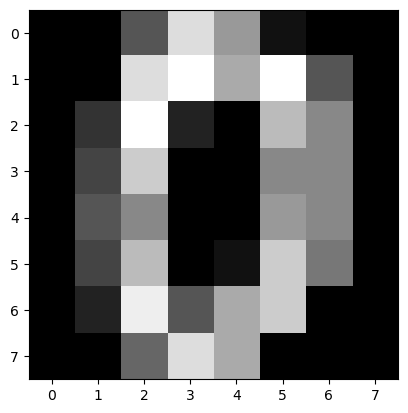

In [3]:
digits = load_digits()
print(f'{digits.data.shape=}')

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

plt.imshow(digits.images[0], cmap='grey')
plt.show()


def transform_one_hot(classe):
    a =  np.zeros(10)
    a[classe] = 1
    return a

y_train_one_hot=[]
for y in y_train:
    y_train_one_hot.append(transform_one_hot(y))
    
y_train_one_hot = np.array(y_train_one_hot)


In [5]:
ic.disable()

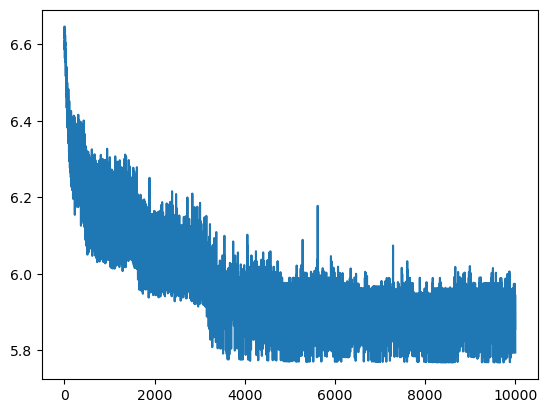

accuracy :  (1206, 0.8392484342379958)


In [9]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=500, eps=1e-2, shuffle=False)

plt.plot(np.arange(len(couts)), couts)
plt.show()

raw_scores = net.forward(X_train)

def pred_classes(y_hat):
    classes_predites = np.argmax(y_hat, axis=1)
    predictions = []
    for y in classes_predites:
        predictions.append(transform_one_hot(y))
    
    predictions= np.array(predictions)
    return predictions

def score(y, yhat):
    predictions = pred_classes(yhat)
    ic(predictions)
    ic(y)
    comparaison = ic((predictions == 1) * (y == 1))
    s = np.sum(comparaison)
    return s, s/len(yhat)

print("accuracy : ", score(y_train_one_hot, raw_scores))
